In [1]:
import ttim
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
sys.path.append(os.path.join('..'))
import subtim.compaction as sub

In [2]:
z = [87,-460,-1565,-1895,-2922]
kaq = [15.56782378,	7.02081448,	0.01093212113,	1.87681798]
Saq = [0.006000000052,	0.000360000005,	0.00033000001,	0.000347399997]
kzoverkh = .1

In [3]:
ten_years = 10 * 365.25

In [4]:
ml = ttim.Model3D(kaq,z,Saq,kzoverkh,tmin=1e-6,tmax=ten_years)
print(ml.tmin)

1e-06


In [5]:
Qgpd = 5000000.0
Qgpm = Qgpd / (60*24)
Qcfd = (Qgpm / 7.4801) * (60*24)

In [6]:
tsandQ = [(0,0),(365.25,Qcfd),(365.25*2,0),(365.25*3,Qcfd),(365.25*5,0),(365.25*5.5,Qcfd)]


In [7]:
res = .1
x,y = 0.,0.
rw = (12.75/12)*.5

In [8]:
well = ttim.Well(ml,x,y,rw,tsandQ,res,layers=3,label='well')


In [9]:
ml.solve()

self.neq  1
solution complete


In [10]:

time = np.arange(0,365.26*10,365.25)
h = ml.head(x,y,time,[0,1,2,3])

Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted


In [11]:
drawdown = [] #[h[0][0] - h[0],h[1][1] - h[1]]
for lay in range(len(h)):
    drawdown.append(h[0][lay]-h[lay])
drawdown = np.array(drawdown)
print(drawdown.shape)

(4, 11)


In [12]:
drawdown = []
ddDF = pd.read_csv('Drawdown.csv')
for lay in range(4):
    drawdown.append(ddDF[f'layer_{1+lay}'].tolist())
drawdown = np.array(drawdown)
print(drawdown.shape)

(4, 92)


In [13]:
time = ddDF['Time']


In [14]:
LN = [2,1,1,1]
HC = [87,87,87,87]

In [15]:
ske = 5e-6
skv = 3e-4
Sfe = [[ske,ske],[ske,ske,ske]]
Sfv = [[skv,skv],[skv,skv,skv]]

sfe = [0.000174519999,	0.000115000003,	1.70E-07,	6.30E-06]
sfv = [0.01745199971,	0.01150000002,	1.70E-05,	0.000630000024]

In [16]:
Sfe_ls, Sfv_ls = [], []
for i in range(len(LN)):
    print(LN[i])
    e,v = [], []
    for ln in range(LN[i]):
        e.append(sfe[i])
        v.append(sfv[i])
    Sfe_ls.append(e)
    Sfv_ls.append(v)

2
1
1
1


In [17]:
comp = sub.NonDelay(drawdown,z,LN,HC,Sfe_ls,Sfv_ls) #,Com,ComE,ComV)


(4, 92)


In [18]:
def compress_coef(dp,dv,V):
    
    """
    :param dp:
    :param dv:
    :param V:
    :return: a
    """
    
    a = dv/V * (1/dp)
    return a

In [19]:
def ff(delh,a,b):
    
    """
    :param delh: change in hydraulic head in the aquifer
    :param a: Aquifer compressibility coef, (calculated from one or more interbeds)
    :param b:
    :return: delb
    """
    
    delb = delh * a *b
    return delb


In [20]:
def pore_p(h,he,g=32.17405,Pw=62.42796529):
    
    """
    :param h: head ft
    :param he: elevation head relative to datum
    :param g: gravity in ft/s^2
    :param Pw: lb/ft^3
    :return:
    
    """
    # 32.17405 feet per second per second.
    # h = (p)/(Pw*g) + he
    p = (h - he)/(Pw*g)
    return p

In [21]:
def v_Estress(pw,g,h):
    """
    theta = vertical effective stress (positive for increase)
    :param pw:
    :param g:
    :param h:
    :return:
    """
    sh= h[0]
    delh = []
    for i in h:
        delh.append(sh-i)
    theta = -pw * g * delh
    return theta

ValueError: x and y must have same first dimension, but have shapes (92,) and (11,)

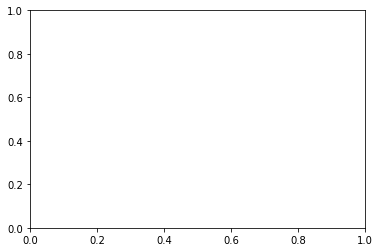

In [22]:
fig, ax = plt.subplots()
for lay in range(len(comp)):
    ax.plot(time/365.25,h[lay], label = f'layer {lay+1}')
ax.grid()
ax.set_xlabel('Years')
ax.set_ylabel('Drawdown')

In [23]:
data = {}
for lay in range(len(drawdown)):
    data[f'layer_{lay+1}'] = comp[lay]
compDF = pd.DataFrame(data)

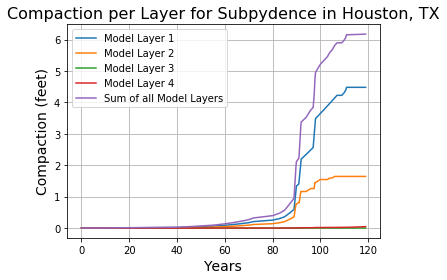

In [24]:
fig, ax = plt.subplots()
compDF['all_lays'] = 0
for lay in range(len(comp)):
    ax.plot(time-10000,compDF[f'layer_{lay+1}'].cumsum(),label=f'Model Layer {lay+1}')
    compDF['all_lays'] += compDF[f'layer_{lay+1}'].cumsum()

ax.plot(time-10000,compDF['all_lays'],label=f'Sum of all Model Layers')
ax.grid()
ax.set_xlabel('Years', size=14)
ax.set_ylabel('Compaction (feet)', size=14)
ax.legend()
plt.title('Compaction per Layer for Subpydence in Houston, TX', size=16)
fig.tight_layout()
fig.savefig('tot_comp.png')

Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are 

Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are 

Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are 

Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are substituted
Warning, some of the times are smaller than tmin or larger than tmax; zeros are 

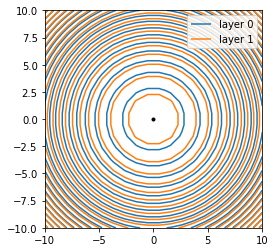

In [26]:
head_c = ml.contour(win=[-10,10,-10,10],t=time.max(),layers=[0,1])
xg = np.arange(-10,10,2)
yg = xg
headgrid = ml.headgrid(xg,yg,t=time.max(),layers=[0,1])

In [27]:
dd_c = head_c[1][0] - head_c[1]
comp_c = sub.NonDelay(ml,drawdown,z,LN,HC,Sfe,Sfv)#,Com,ComE,ComV)

TypeError: 'NoneType' object is not subscriptable

(2, 1, 10, 10)


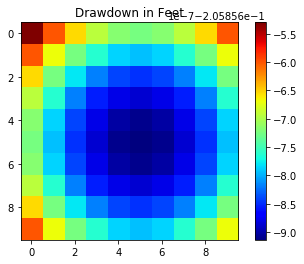

In [29]:
fig, ax = plt.subplots()
plt.imshow(headgrid[0][0],cmap='jet')
plt.colorbar()
plt.title('Drawdown in Feet')
print(headgrid.shape)

drawdowngrid = headgrid[0] - headgrid
# compgrid = sub.NonDelayGrid(drawdowngrid,z,LN,HC,Sfe,Sfv)

plt.show()